In [1]:
#import dependencies

import os
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in files

accident_data = "./accident.csv"

adot_county_funding = "./ADOT Five Year Transportation Facilities Construction Program.csv"

In [3]:
#read each csv

accidents = pd.read_csv(accident_data)

accidents.columns

Index(['index', 'accident_id', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PEDS',
       'PERSONS', 'COUNTY', 'county_name', 'CITY', 'city_name', 'DAY', 'MONTH',
       'YEAR', 'HOUR', 'MINUTE', 'NHS', 'FUNC_SYS', 'func_sys_lit', 'ROAD_FNC',
       'road_fnc_lit', 'RD_OWNER', 'rd_owner_lit', 'TWAY_ID', 'TWAY_ID2',
       'LATITUDE', 'LONGITUD', 'SP_JUR', 'sp_jur_lit', 'HARM_EV',
       'harm_ev_lit', 'MAN_COLL', 'man_coll_lit', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'lgt_cond_lit',
       'WEATHER', 'weather_lit', 'SCH_BUS', 'CF1', 'CF2', 'CF3', 'cf1_lit',
       'cf2_lit', 'cf3_lit', 'FATALS', 'A_INTER', 'a_inter_lit', 'A_ROADFC',
       'a_road_fc_lit', 'A_TOD', 'a_tod_lit', 'A_DOW', 'a_dow_lit', 'A_LT',
       'a_lt_lit', 'A_SPCRA', 'a_spcra_lit', 'A_PED', 'a_ped_lit', 'A_PED_F',
       'a_ped_f_lit', 'A_PEDAL', 'a_pedal_lit', 'A_PEDAL_F', 'a_pedal_f_lit',
       'A_POLPUR', 'a_polour_lit', 'A_POSBAC', 'a_posbac_lit', 'A_DIST',
       'a_dist_lit', 'A_DR

In [54]:
#read the csv for funding
adot_funding = pd.read_csv(adot_county_funding)

adot_funding.columns

Index(['County', '2012', '2013', '2014', '2015', '2016'], dtype='object')

In [5]:
#create reduced dataframe with only necessary columns from accident data

accidents_by_county = accidents[['accident_id', 'county_name', 'YEAR']]

In [6]:
#determine the counties provided in the dataset
accidents['county_name'].unique()

array(['PIMA', 'YAVAPAI', 'MARICOPA', 'GRAHAM', 'PINAL', 'MOHAVE', 'GILA',
       'NAVAJO', 'YUMA', 'APACHE', 'LA PAZ', 'SANTA CRUZ', 'COCONINO',
       'GREENLEE', 'COCHISE', '999'], dtype=object)

In [7]:
#count the total # of rows in accidents data

accidents_by_county.count()

accident_id    1860
county_name    1860
YEAR           1860
dtype: int64

In [8]:
#drop any "999"
accidents_reduced = accidents_by_county[accidents_by_county['county_name'] != "999"]

print(accidents_reduced.reset_index(drop=True))

      accident_id county_name  YEAR
0      2012040001        PIMA  2012
1      2012040002     YAVAPAI  2012
2      2012040003    MARICOPA  2012
3      2012040004    MARICOPA  2012
4      2012040005        PIMA  2012
...           ...         ...   ...
1849   2016040872    MARICOPA  2016
1850   2016040875      NAVAJO  2016
1851   2016040876    MARICOPA  2016
1852   2016040877    MARICOPA  2016
1853   2016040880       PINAL  2016

[1854 rows x 3 columns]


In [25]:
#use the reduced dataframe and total the # of accidents per county, per year
accidents_county_year = accidents_reduced.groupby(['county_name', 'YEAR'], as_index=False)['accident_id'].count()

#move the years to columns and count of accident id to rows
per_county = pd.DataFrame(accidents_county_year.pivot(index='YEAR', columns='county_name', values='accident_id'))

#fill any NaN with 0
per_county = per_county.fillna(0)

per_county

county_name,APACHE,COCHISE,COCONINO,GILA,GRAHAM,GREENLEE,LA PAZ,MARICOPA,MOHAVE,NAVAJO,PIMA,PINAL,SANTA CRUZ,YAVAPAI,YUMA
YEAR,,,,,,,,,,,,,,,
2012,31.0,7.0,25.0,11.0,1.0,5.0,7.0,137.0,15.0,17.0,56.0,33.0,4.0,21.0,12.0
2013,18.0,11.0,22.0,14.0,1.0,4.0,6.0,147.0,17.0,23.0,47.0,33.0,4.0,19.0,15.0
2014,22.0,6.0,23.0,11.0,7.0,1.0,4.0,145.0,14.0,23.0,40.0,18.0,1.0,16.0,15.0
2015,34.0,6.0,15.0,15.0,5.0,0.0,5.0,138.0,18.0,17.0,36.0,35.0,4.0,15.0,11.0
2016,22.0,10.0,24.0,11.0,4.0,1.0,3.0,190.0,11.0,17.0,42.0,34.0,0.0,16.0,6.0


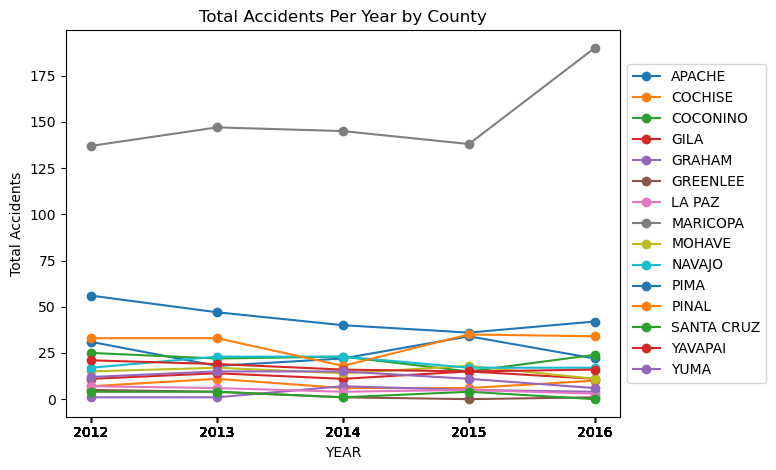

In [36]:
#create a line graph showing the total # of accidents per county
x_value = accidents_county_year['YEAR']

per_county.plot(kind='line', marker = "o")
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(ticks=x_value, labels=[int(year) for year in x_value])
plt.title('Total Accidents Per Year by County')
plt.ylabel('Total Accidents')
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [88]:
#create a dataframe to review the funding for each county

funding_df = pd.DataFrame(adot_funding)

funding_df

,County,2012,2013,2014,2015,2016
0,Apache,41803,18955,600,17000,0
1,Cochise,27722,18400,0,5000,0
2,Coconino,13485,57593,0,0,0
3,Gila,12640,7450,0,0,3000
4,Graham,0,5259,2000,0,0
5,Greenlee,0,0,0,0,0
6,La Paz,7121,6957,0,0,0
7,Mohave,12095,4000,0,26500,25000
8,Navajo,29547,13309,17731,6000,0
9,Pima,98020,80037,87585,58124,67000


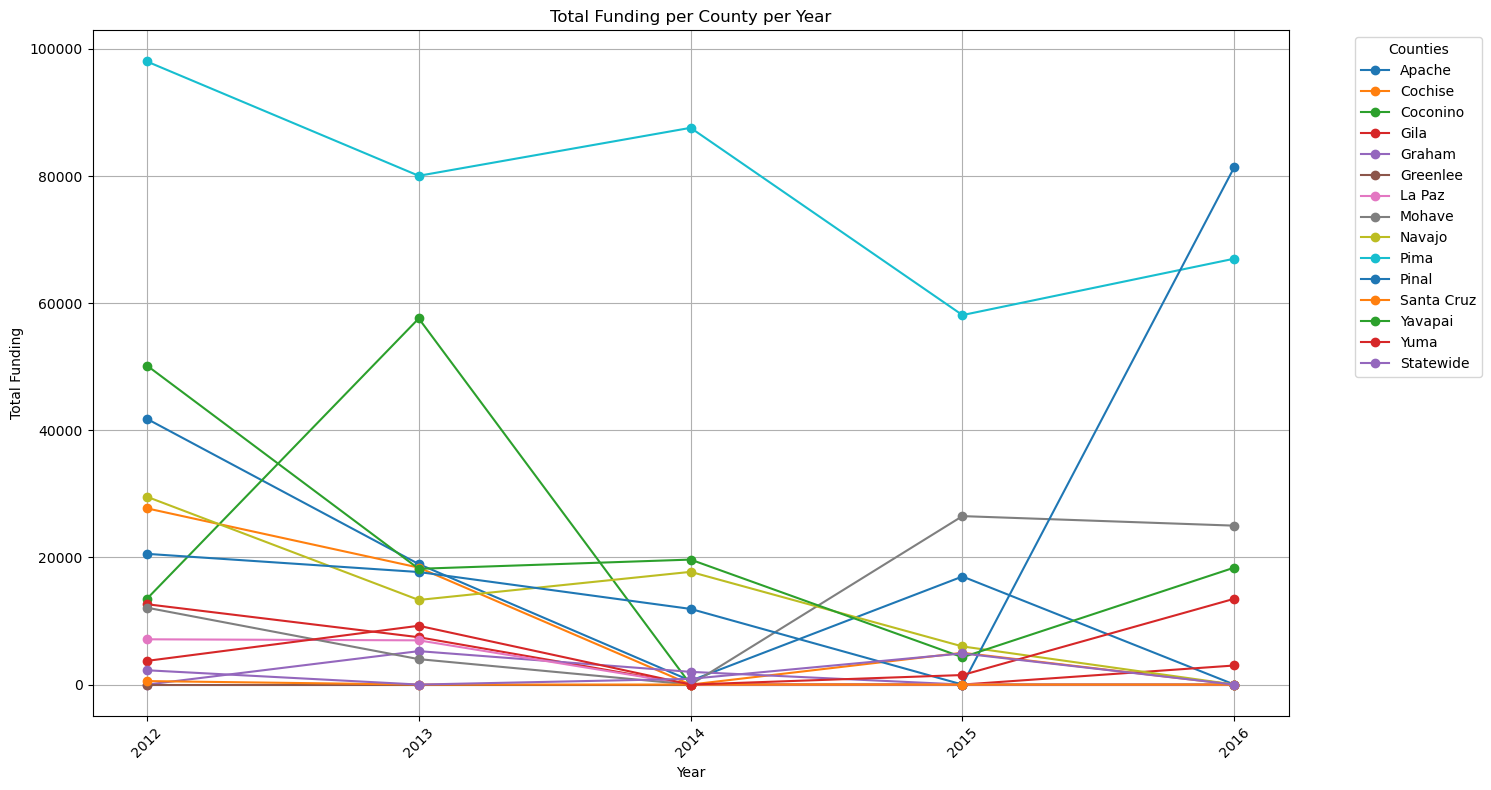

In [89]:
#set the index as the county
funding_df.set_index('County', inplace=True)

# Transpose the DataFrame 
funding_df = funding_df.transpose()

# Plot
plt.figure(figsize=(15, 8))
for county in funding_df.columns:
    plt.plot(funding_df.index, funding_df[county], marker='o', label=county)

# Update x-ticks to show years
plt.xticks(ticks=funding_df.index, labels=funding_df.index)

plt.title('Total Funding per County per Year')
plt.xlabel('Year')
plt.ylabel('Total Funding')
plt.xticks(rotation=45)
plt.legend(title='Counties', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 100x50 with 0 Axes>

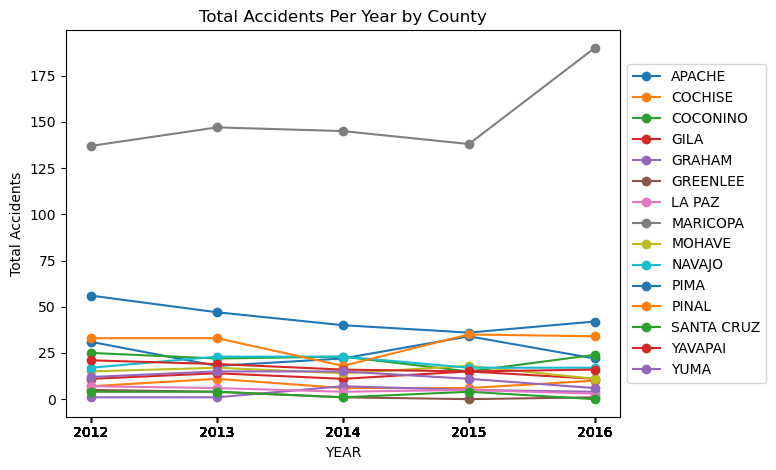

In [80]:
#show both graphs together for comparison

#accident data:
x_value = accidents_county_year['YEAR']

per_county.plot(kind='line', marker = "o")
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(ticks=x_value, labels=[int(year) for year in x_value])
plt.title('Total Accidents Per Year by County')
plt.ylabel('Total Accidents')
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))